In [1]:
import sys
sys.path.append("/Users/tdinelli/Documents/GitHub/pySMOKEPostProcessor")
import os
from pySMOKEPostProcessor import PostProcessor
import matplotlib.pyplot as plt

# Reaction rate Analysis by Reaction Class

combination of formation rates and reaction classification

In [2]:
base_path = os.getcwd()
kin_xml_fld = os.path.join(base_path, 'data', 'Classes', 'kinetics-soot')
class_groups_file = os.path.join(base_path, 'data', 'Classes', 'rxn_class_groups.txt')
plt_fld = os.path.join(base_path, 'Figures')

simul_fld = os.path.join("../data/Classes-SOOT/Classes/simul/Output_newOS")

In [5]:
# species and class type
species_list = ['C6H6','C7H8','BIN1A']
sortlist = ['classtype'] # classtype, speciestype, reactiontype, bimoltype (R+R, RSR+RSR, M+M, ETC) sum if both apply and sort by this criteria

# ropa options:
rate_type = 'TOT'          # BOTH CONSUMPTION AND PRODUCTION ARE PLOTTED
x_axis = 'axial-coordinate' # simulation of a flame - along axial coordinate

# assign class
pp = PostProcessor(kin_xml_fld, simul_fld)
fluxbyclass = pp.FluxByClass(kinetic_mechanism = kin_xml_fld, 
                          classes_definition = class_groups_file, 
                          verbose = False)

# assign cumulative rate
for species_i in species_list:
        x, rr_matrix, name_and_maxflux = fluxbyclass.process_cumulative_reaction_rate(
        simul_fld, x_axis, species_i, rate_type,
        # optional inputs: set to default as example
        filter_ClassesToPlot = [], threshold = 5e-2, n_of_rxns = 40, verbose = False)
        #plot
		
        fig,ax=plt.subplots(nrows=1, ncols=1)
        
        for j in range(len(name_and_maxflux)):
            ax.stackplot(x, rr_matrix[j], edgecolor = 'black', alpha = 0.5)	

        ax.legend(name_and_maxflux, fontsize="8")
        ax.set_xlabel('Axial coordinate [cm]')
        ax.set_ylabel( rate_type + ' rate of ' + species_i + ' [kmol/m3/s]')
        plt.tight_layout()
        pp.save_fig(fig, plt_fld, [''], simul_name + '-' + rate_type +'-' + 'rates-' + species_i)



ValueError: Output folder does not contain the Output.xml file

 * Warning: reactiontype GAS-ALL not found in class groups


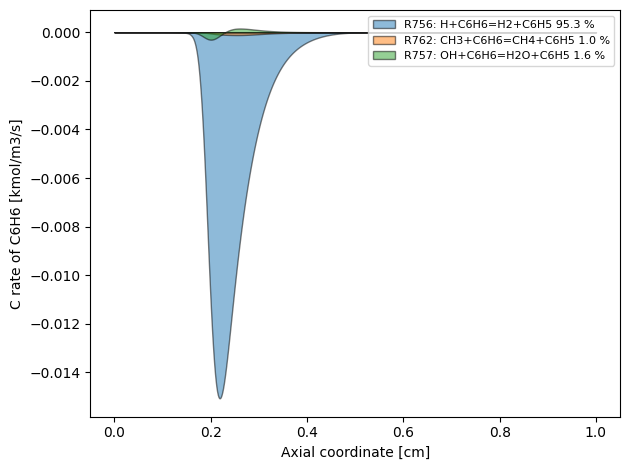

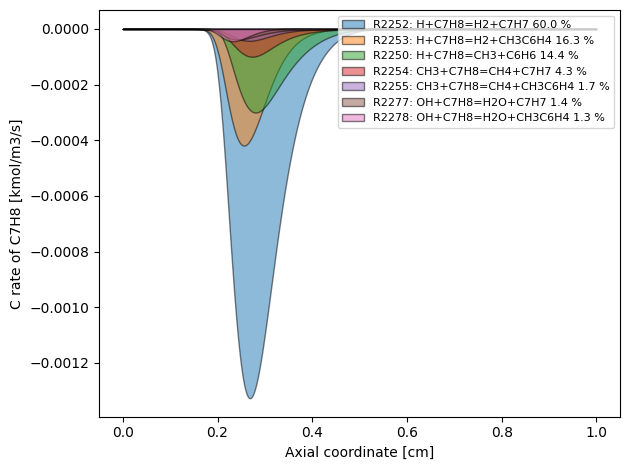

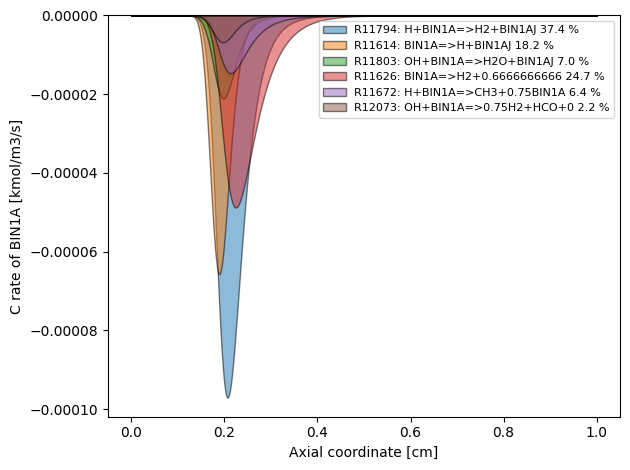

In [4]:
# only consumption considered
# species and class type
species_list = ['C6H6','C7H8','BIN1A']
sortlist = ['classtype'] # classtype, speciestype, reactiontype, bimoltype (R+R, RSR+RSR, M+M, ETC) sum if both apply and sort by this criteria

# ropa options:
rate_type = 'C'          # CONSUMPTION 
x_axis = 'axial-coordinate' # simulation of a flame - along axial coordinate

# assign class
fluxbyclass = pp.FluxByClass(kinetic_mechanism = kin_xml_fld, 
                          classes_definition = class_groups_file, 
                          verbose = False)

# assign cumulative rate
for species_i in species_list:
        x, rr_matrix, name_and_maxflux = fluxbyclass.process_cumulative_reaction_rate(
        simul_fld, x_axis, species_i, rate_type,
        # optional inputs: set to default as example
        filter_ClassesToPlot = [], threshold = 1e-2, n_of_rxns = 40, verbose = False)
        #plot
		
        fig,ax=plt.subplots(nrows=1, ncols=1)
        
        for j in range(len(name_and_maxflux)):
            ax.stackplot(x, rr_matrix[j], edgecolor = 'black', alpha = 0.5)	

        ax.legend(name_and_maxflux, fontsize="8")
        ax.set_xlabel('Axial coordinate [cm]')
        ax.set_ylabel( rate_type + ' rate of ' + species_i + ' [kmol/m3/s]')
        plt.tight_layout()
        pp.save_fig(fig, plt_fld, [''], simul_name + '-' + rate_type +'-' + 'rates-' + species_i)

### Reaction rates by class

 * Warning: reactiontype GAS-ALL not found in class groups


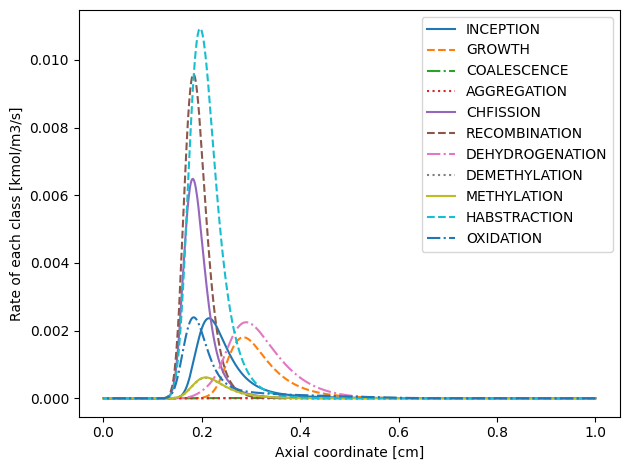

In [16]:
# processes reaction rates by class - rates independent of a specific species
# ropa options:
x_axis = 'axial-coordinate'

# assign class
fluxbyclass = pp.FluxByClass(kinetic_mechanism = kin_xml_fld, 
                          classes_definition = class_groups_file, 
                          verbose = True)

fig, ax = plt.subplots(nrows = 1, ncols = 1) #initialize figure
# assign cumulative rate
filter_ClassesToPlot = ['INCEPTION','GROWTH','COALESCENCE','AGGREGATION','CHFISSION','RECOMBINATION','DEHYDROGENATION','DEMETHYLATION','METHYLATION','HABSTRACTION','OXIDATION']
linestyles = ['-', '--', '-.', ':']*3
for i, class_i in enumerate(filter_ClassesToPlot): 	
    x, rr = fluxbyclass.process_reaction_class_rate(simul_fld, x_axis, class_i)
    
    ax.plot(x, rr, linestyle = linestyles[i])
    
ax.legend(filter_ClassesToPlot, fontsize="10")
ax.set_xlabel('Axial coordinate [cm]')
ax.set_ylabel('Rate of each class [kmol/m3/s]')
plt.tight_layout()
pp.save_fig(fig, plt_fld, sortlist, simul_name + '-rates')
        
